In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy import integrate
#from sauron_colormap import sauron
import pandas as pd
import math

In [3]:
def smooth_mask(cube,beam,chans2look,rmsfac=3):
    mask=ndimage.uniform_filter(cube,size=[4,beam*1.5,beam*1.5])
    quart=np.floor(np.array(cube.shape)/8.).astype(np.int)
    half=np.floor(np.array(cube.shape)/2.).astype(np.int)
    #print(half, quart)
    rms=np.nanstd(mask[chans2look[0]:chans2look[1],half[1]-quart[1]:half[1]+quart[1],half[2]-quart[2]:half[2]+quart[2]])
    return mask>rms*rmsfac

In [4]:
def spectrum(cube):
    spec=np.nansum(np.nansum(cube,axis=1),axis=1)
    return spec

In [5]:
param=pd.read_csv('/home/jacob/Documents/CARS/Cars_parameters.csv')
cs=param[param['Line']=='CS']
hco=param[param['Line']=='HCO+']
hcn=param[param['Line']=='HCN']

FileNotFoundError: [Errno 2] No such file or directory: '/home/jacob/Documents/CARS/Cars_parameters.csv'

In [ ]:
csnoflux=[]
csnoerr=[]
csflux=[]
cserr=[]
for i in range(len(cs['Galaxy & Line'])):
    csdect=np.array(cs['All line detection'])
    csrms=np.array(cs['RMS'])
    cslw=np.array(cs['Linewidth'])
    csbeam=np.array(cs['Beam Size'])
    if csdect[i]=='No':
        csf=3*csrms[i]*cslw[i]*csbeam[i]
        csnoflux.append(csf)
        cserror=csrms[i]
        csnoerr.append(cserror)
    else:
        cspath=cs['File Path']
        csfilepath=np.array(cspath)
        csminh=np.array(cs['Height Min'])
        csmaxh=np.array(cs['Height Max'])
        csminw=np.array(cs['Width Min'])
        csmaxw=np.array(cs['Width Max'])
        csminchn=np.array(cs['Min Chan'])
        csmaxchn=np.array(cs['Max Chan'])
        csnchan=np.array(cs['Nchan'])
        cschnwdth=np.array(cs['Channel Width'])
        hducs=fits.open(csfilepath[i])
        datacs=hducs[0].data
        datancs=np.squeeze(datacs)
        datanancs=np.nan_to_num(datancs)
        databeamcs=datanancs*csbeam[i]
        speccs=spectrum(databeamcs[csminchn[i]:csmaxchn[i],csminh[i]:csmaxh[i],csminw[i]:csmaxw[i]])
        csint=np.sum(speccs)*cschnwdth[i]
        csflux.append(csint)
        cserror=np.sqrt(csnchan[i])*csbeam[i]*csrms[i]*cschnwdth[i]
        cserr.append(cserror)

In [6]:
hcoflux=[]
hcoerr=[]
hconoflux=[]
hconoerr=[]
for i in range(len(hco['Galaxy & Line'])):
    hcodect=np.array(hco['All line detection'])
    if hcodect[i]=='No':
        hcopath=hco['File Path']
        hcofilepath=np.array(hcopath)
        hcobeam=np.array(hco['Beam Size'])
        hcominh=np.array(hco['Height Min'])
        hcomaxh=np.array(hco['Height Max'])
        hcominw=np.array(hco['Width Min'])
        hcomaxw=np.array(hco['Width Max'])
        hcominchn=np.array(hco['Min Chan'])
        hcomaxchn=np.array(hco['Max Chan'])
        hconchan=np.array(hco['Nchan'])
        hcochnwdth=np.array(hco['Channel Width'])
        hcorms=np.array(hco['RMS'])
        hduhco=fits.open(hcofilepath[i])
        datahco=hduhco[0].data
        datanhco=np.squeeze(datahco)
        datananhco=np.nan_to_num(datanhco)
        databeamhco=datananhco*hcobeam[i]
        spechco=spectrum(databeamhco[hcominchn[i]:hcomaxchn[i],hcominh[i]:hcomaxh[i],hcominw[i]:hcomaxw[i]])
        hcoint=np.sum(spechco)*hcochnwdth[i]
        hconoflux.append(hcoint)
        hcoerror=np.sqrt(hconchan[i])*hcobeam[i]*hcorms[i]*hcochnwdth[i]
        hconoerr.append(hcoerror)
    else:
        hcopath=hco['File Path']
        hcofilepath=np.array(hcopath)
        hcobeam=np.array(hco['Beam Size'])
        hcominh=np.array(hco['Height Min'])
        hcomaxh=np.array(hco['Height Max'])
        hcominw=np.array(hco['Width Min'])
        hcomaxw=np.array(hco['Width Max'])
        hcominchn=np.array(hco['Min Chan'])
        hcomaxchn=np.array(hco['Max Chan'])
        hconchan=np.array(hco['Nchan'])
        hcochnwdth=np.array(hco['Channel Width'])
        hcorms=np.array(hco['RMS'])
        hduhco=fits.open(hcofilepath[i])
        datahco=hduhco[0].data
        datanhco=np.squeeze(datahco)
        datananhco=np.nan_to_num(datanhco)
        databeamhco=datananhco*hcobeam[i]
        spechco=spectrum(databeamhco[hcominchn[i]:hcomaxchn[i],hcominh[i]:hcomaxh[i],hcominw[i]:hcomaxw[i]])
        hcoint=np.sum(spechco)*hcochnwdth[i]
        hcoflux.append(hcoint)
        hcoerror=np.sqrt(hconchan[i])*hcobeam[i]*hcorms[i]*hcochnwdth[i]
        hcoerr.append(hcoerror)

NameError: name 'hco' is not defined

In [7]:
hcnflux=[]
hcnerr=[]
hcnnoflux=[]
hcnnoerr=[]
for i in range(len(hcn['Galaxy & Line'])):
    hcndect=np.array(hcn['All line detection'])
    if hcndect[i]=='No':
        hcnpath=hcn['File Path']
        hcnfilepath=np.array(hcnpath)
        hcnbeam=np.array(hcn['Beam Size'])
        hcnminh=np.array(hcn['Height Min'])
        hcnmaxh=np.array(hcn['Height Max'])
        hcnminw=np.array(hcn['Width Min'])
        hcnmaxw=np.array(hcn['Width Max'])
        hcnminchn=np.array(hcn['Min Chan'])
        hcnmaxchn=np.array(hcn['Max Chan'])
        hcnnchan=np.array(hcn['Nchan'])
        hcnchnwdth=np.array(hcn['Channel Width'])
        hcnrms=np.array(hcn['RMS'])
        hduhcn=fits.open(hcnfilepath[i])
        datahcn=hduhcn[0].data
        datanhcn=np.squeeze(datahcn)
        datananhcn=np.nan_to_num(datanhcn)
        databeamhcn=datananhcn*hcnbeam[i]
        spechcn=spectrum(databeamhcn[hcnminchn[i]:hcnmaxchn[i],hcnminh[i]:hcnmaxh[i],hcnminw[i]:hcnmaxw[i]])
        hcnint=np.sum(spechcn)*hcnchnwdth[i]
        hcnnoflux.append(hcnint)
        hcnerror=np.sqrt(hcnnchan[i])*hcnbeam[i]*hcnrms[i]*hcnchnwdth[i]
        hcnnoerr.append(hcnerror)
    else:
        hcnpath=hcn['File Path']
        hcnfilepath=np.array(hcnpath)
        hcnbeam=np.array(hcn['Beam Size'])
        hcnminh=np.array(hcn['Height Min'])
        hcnmaxh=np.array(hcn['Height Max'])
        hcnminw=np.array(hcn['Width Min'])
        hcnmaxw=np.array(hcn['Width Max'])
        hcnminchn=np.array(hcn['Min Chan'])
        hcnmaxchn=np.array(hcn['Max Chan'])
        hcnnchan=np.array(hcn['Nchan'])
        hcnchnwdth=np.array(hcn['Channel Width'])
        hcnrms=np.array(hcn['RMS'])
        hduhcn=fits.open(hcnfilepath[i])
        datahcn=hduhcn[0].data
        datanhcn=np.squeeze(datahcn)
        datananhcn=np.nan_to_num(datanhcn)
        databeamhcn=datananhcn*hcnbeam[i]
        spechcn=spectrum(databeamhcn[hcnminchn[i]:hcnmaxchn[i],hcnminh[i]:hcnmaxh[i],hcnminw[i]:hcnmaxw[i]])
        hcnint=np.sum(spechcn)*hcnchnwdth[i]
        hcnflux.append(hcnint)
        hcnerror=np.sqrt(hcnnchan[i])*hcnbeam[i]*hcnrms[i]*hcnchnwdth[i]
        hcnerr.append(hcnerror)

        

NameError: name 'hcn' is not defined

In [43]:
hcnhcoerrmax=[]
hcnhcoerrmin=[]
hcnhconoerrmax=[]
hcnhconoerrmin=[]
hcndect=np.array(hcn[hcn['All line detection']=='Yes'])
hcnnodect=np.array(hcn[hcn['All line detection']=='No'])
for i in range(len(hcndect)):
    hcn_hcoerr=(hcnflux[i]+np.random.normal(0,hcnerr[i],1000))/(hcoflux[i]+np.random.normal(0,hcoerr[i],1000))
    lowerhco=np.percentile(hcn_hcoerr,16)
    upperhco=np.percentile(hcn_hcoerr,84)
    hcnhcoerrmax.append(upperhco)
    hcnhcoerrmin.append(lowerhco)
for i in range(len(hcnnodect)):
    hcn_hconoerr=(hcnnoflux[i]+np.random.normal(0,hcnnoerr[i],1000))/(hconoflux[i]+np.random.normal(0,hconoerr[i],1000))
    lowernohco=np.percentile(hcn_hconoerr,16)
    uppernohco=np.percentile(hcn_hconoerr,84)
    hcnhconoerrmax.append(uppernohco)
    hcnhconoerrmin.append(lowernohco)

In [44]:
hcncserrmax=[]
hcncserrmin=[]
hcncsnoerrmax=[]
hcncsnoerrmin=[]
csdect=np.array(cs[cs['All line detection']=='Yes'])
csnodect=np.array(cs[cs['All line detection']=='No'])
for i in range(len(csdect)):
    hcn_cserr=(hcnflux[i]+np.random.normal(0,hcnerr[i],1000))/(csflux[i]+np.random.normal(0,cserr[i],1000))
    lowercs=np.percentile(hcn_cserr,16)
    uppercs=np.percentile(hcn_cserr,84)
    hcncserrmax.append(uppercs)
    hcncserrmin.append(lowercs)
for i in range(len(csnodect)):
    hcn_csnoerr=(hcnnoflux[i]+np.random.normal(0,hcnnoerr[i],1000))/(csnoflux[i]+np.random.normal(0,csnoerr[i],1000))
    lowernocs=np.percentile(hcn_csnoerr,16)
    uppernocs=np.percentile(hcn_csnoerr,84)
    hcncsnoerrmax.append(uppernocs)
    hcncsnoerrmin.append(lowernocs)

In [45]:
iz=pd.read_csv('/home/jacob/Documents/Izumi.csv')

In [46]:
print(hcnnoflux)

[1.3873878121376038, 2.3202866315841675]


In [47]:
print(csnoflux)

[0.013098599999999998, 0.021369599999999996]


In [48]:
AGN=iz[iz['Type']=='AGN']
SB=iz[iz['Type']=='SB']
hcn_hco=np.array(hcnflux)/np.array(hcoflux)
hcn_cs=np.array(hcnflux)/np.array(csflux)
hcn_hco_no=np.array(hcnnoflux)/np.array(hconoflux)
hcn_cs_no=np.array(hcnnoflux)/np.array(csnoflux)

Text(0, 0.5, 'HCN/CS')

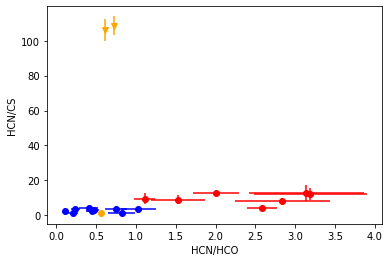

In [49]:
plt.plot(AGN['HCN/HCO'],AGN['HCN/CS'],'o',color='red')
plt.errorbar(AGN['HCN/HCO'],AGN['HCN/CS'],xerr=AGN['Error1'],yerr=AGN['Error2'],fmt='none',ecolor='red')
plt.plot(SB['HCN/HCO'],SB['HCN/CS'],'o',color='blue')
plt.errorbar(SB['HCN/HCO'],SB['HCN/CS'],xerr=SB['Error1'],yerr=SB['Error2'],fmt='none',ecolor='blue')
plt.plot(hcn_hco,hcn_cs,'o',color='orange')
plt.plot(hcn_hco_no,hcn_cs_no,'v',color='orange')
plt.hlines(hcn_cs,hcnhcoerrmax,hcnhcoerrmin,color='orange')
plt.vlines(hcn_hco,hcncserrmax,hcncserrmin,color='orange')
plt.hlines(hcn_cs_no,hcnhconoerrmax,hcnhconoerrmin,color='orange')
plt.vlines(hcn_hco_no,hcncsnoerrmax,hcncsnoerrmin,color='orange')
plt.xlabel('HCN/HCO')
plt.ylabel('HCN/CS')

In [7]:
test=fits.open('/home/jacob/Documents/CARS/HE11082813/25clean.fits')
test1=fits.open('/home/jacob/Documents/CARS/HE11082813/cleanco.fits')
momhdu=fits.open('/home/jacob/Documents/CARS/HE11082813/moment0.fits')

In [8]:
datat=test[0].data
datatn=np.squeeze(datat)
datatnan=np.nan_to_num(datatn)
hdrt=test[0].header
beamtab=test[1].data
bmajas=np.median(beamtab['BMAJ'])
bmaj=bmajas/3600
maskt=smooth_mask(datatnan,bmaj/np.abs(hdrt['CDELT1']),[1,10],rmsfac=1.5)
datat1=test1[0].data
datatn1=np.squeeze(datat1)
datatnan1=np.nan_to_num(datatn1)
hdrt1=test1[0].header
beamtab1=test1[1].data
bmajas1=np.median(beamtab1['BMAJ'])
bmaj1=bmajas1/3600
maskt1=smooth_mask(datatnan1,bmaj1/np.abs(hdrt1['CDELT1']),[1,10],rmsfac=1.5)
momdata=momhdu[0].data
mom=np.squeeze(momdata)
#momhdr=momhdu[0].header
#mommask=smooth_mask(mom,momhdr['BMAJ']/np.abs(momhdr['CDELT1']),[1,10],rmsfac=1.5)

In [9]:
print(hdrt)

SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    4                                                  NAXIS1  =                  128                                                  NAXIS2  =                  128                                                  NAXIS3  =                   82                                                  NAXIS4  =                    1                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BTYPE   = 'Intensity'                                                           OBJECT  = 'HE1108-2813'                                                                                                 

In [10]:
bminas=np.median(beamtab['BMIN'])
xcellsize=hdrt['CDELT1']*3600
inv_beam=(math.pi*(bmajas/np.abs(xcellsize))*(bminas/np.abs(xcellsize))/4*math.log(2))
beam=inv_beam**(-1)
print(beam)

0.03720799189196303


In [11]:
def mom_0(cube):
    m0=(cube).sum(axis=0)
    return m0

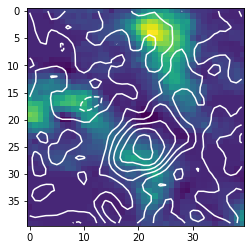

In [12]:
m0=mom_0(datatnan*maskt)
m01=mom_0(datatnan1*maskt1)
im0=plt.imshow(m0[40:80,40:80],alpha=1)
#c01=plt.contour(m01[20:100,20:100],colors='white')
c1=plt.contour(mom[40:80,40:80],colors='white')
plt.show()

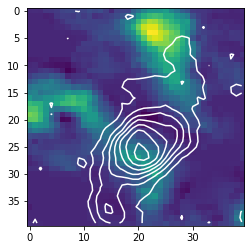

In [18]:
im1=plt.imshow(m0[40:80,40:80],alpha=1)
c1=plt.contour(m01[40:80,40:80],colors='white')

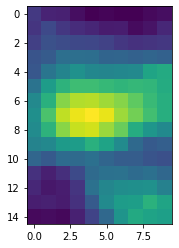

In [19]:
plt.imshow(m0[45:60,15:25])

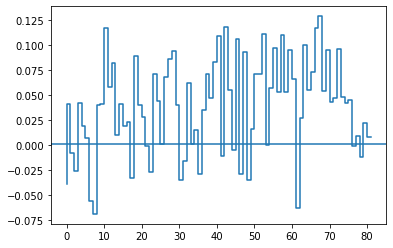

In [21]:
cspec=spectrum(datatn[:,45:60,15:25])
plt.step(np.arange(cspec.shape[0]),cspec)
plt.axhline(0.7e-3)

(1, 79, 128, 128)
(79, 128, 128)
0.05875299756726769


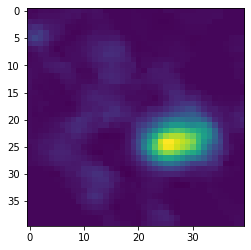

In [8]:
new=fits.open('Documents/CARS/HE10291831/HE1029_29clean.fits')
newdata=new[0].data
newhdr=new[0].header
print(newdata.shape)
newdata1=np.squeeze(newdata)
print(newdata1.shape)
newdata2=np.nan_to_num(newdata1)
newbt=new[1].data
newbmajas=np.median(newbt['BMAJ'])
newbminas=np.median(newbt['BMIN'])
newbmaj=newbmajas/3600
newbmin=newbminas/3600
newxcellsize=newhdr['CDELT1']
newinv_beam=((newbmaj/np.abs(newxcellsize))*(newbmin/np.abs(newxcellsize))*math.pi)/4*math.log(2)
newbeam=newinv_beam**(-1)
print(newbeam)
newmask=smooth_mask(newdata2,newbmaj/np.abs(newhdr['CDELT1']),[1,10],rmsfac=1.5)
newmom0=mom_0(newdata2*newmask)
plt.imshow(newmom0[40:80,40:80])

In [4]:
casa=fits.open('/Users/jelford/Documents/PhD_Work/CARS_Data/HE10291831/CASA')
casadata=casa[0].data

In [5]:
newspec=spectrum((newdata1[:,55:75,55:80]))
totspec=spectrum((newdata1))
print(newspec.shape)
plt.step(np.arange(newspec.shape[0]),newspec)
plt.step(np.arange(casadata.shape[0]),casadata)
#plt.step(np.arange(totspec.shape[0]),totspec)

NameError: name 'spectrum' is not defined

In [13]:
print(newhdr)

SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    4                                                  NAXIS1  =                  128                                                  NAXIS2  =                  128                                                  NAXIS3  =                   79                                                  NAXIS4  =                    1                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BTYPE   = 'Intensity'                                                           OBJECT  = 'HE1029-1831'                                                                                                 

In [24]:
def beam(hdu):
    hdr=hdu[0].header
    beamtab=hdu[1].data
    BMAJas=np.median(beamtab['BMAJ'])
    BMINas=np.median(beamtab['BMIN'])
    xcellsize=hdr['CDELT1']
    bmaj=BMAJas/3600
    bmin=BMINas/3600
    inv_beam=(math.pi*(bmaj/np.abs(xcellsize))*(bmin/np.abs(xcellsize)))/(4*math.log(2))
    beam=inv_beam**(-1)
    print(beam)

In [35]:
hdu=fits.open('/home/jacob/Documents/CARS/HE10291831/HE1029_29clean.fits')
beam(hdu)

0.028228054757922526
